In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/dogs.csv')

In [3]:
data

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = data.columns[1:]

In [5]:
feature_names

Index(['height', 'weight'], dtype='object')

In [6]:
X = data[feature_names]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X)

MinMaxScaler()

In [10]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [11]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


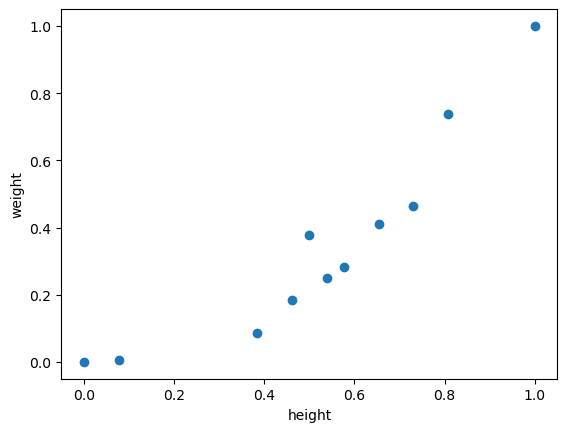

In [12]:
plt.scatter(X['height'], X['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)

In [15]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

In [16]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2])

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage(X, method='single')

In [19]:
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 2.        , 11.        ,  0.10094068,  3.        ],
       [ 9.        , 14.        ,  0.1246148 ,  4.        ],
       [ 1.        , 15.        ,  0.1246148 ,  5.        ],
       [13.        , 16.        ,  0.15167269,  7.        ],
       [ 3.        , 17.        ,  0.28508383,  8.        ],
       [12.        , 18.        ,  0.31753116, 10.        ],
       [ 7.        , 19.        ,  0.32454896, 11.        ]])

In [20]:
from sklearn.metrics import silhouette_score

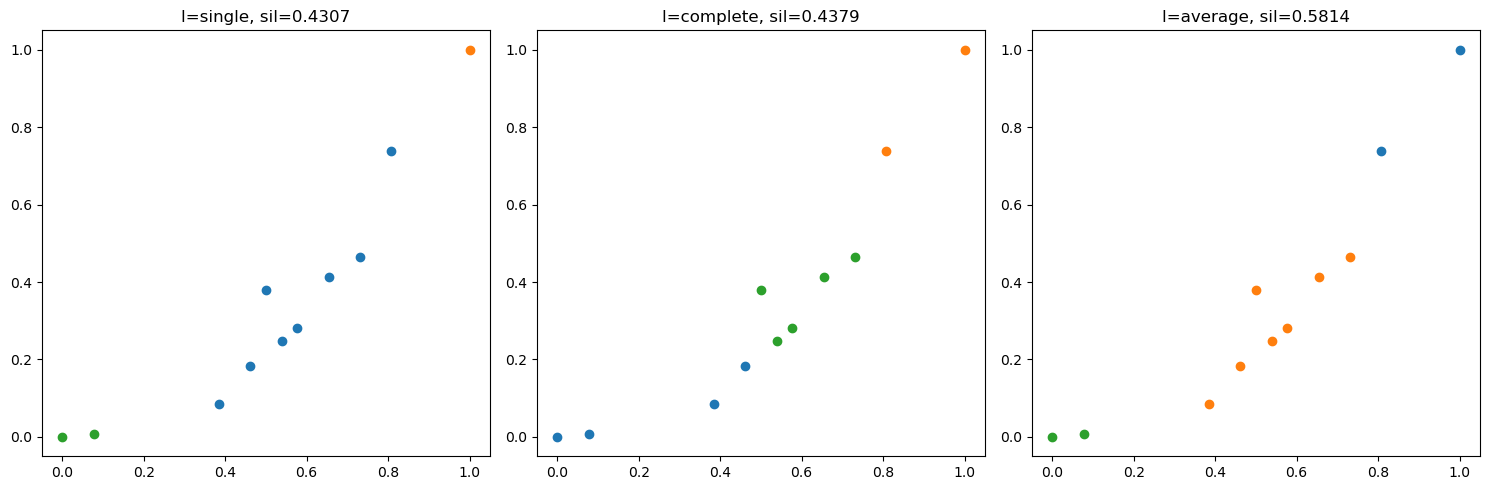

In [24]:
k = 3
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15, 5))

for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    model.fit(X)
    
    fig.add_subplot(1, len(linkages), idx+1)
    
    for c in np.unique(model.labels_):
        elems = X[model.labels_ == c]
        plt.scatter(elems['height'], elems['weight'], label=c)
        
    plt.title(f'l={linkage}, sil={silhouette_score(X, model.labels_):.4f}')
    
plt.tight_layout()

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [26]:
Z = linkage(X, method='average')    centroids = pd.DataFrame(model.centroids, columns=feature_names)
    plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids', color='black')
    

In [27]:
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 1.        ,  2.        ,  0.1246148 ,  2.        ],
       [ 9.        , 11.        ,  0.1304373 ,  3.        ],
       [14.        , 15.        ,  0.21119649,  5.        ],
       [13.        , 16.        ,  0.29077603,  7.        ],
       [ 3.        ,  7.        ,  0.32454896,  2.        ],
       [12.        , 17.        ,  0.59213162,  9.        ],
       [18.        , 19.        ,  0.80001992, 11.        ]])

In [29]:
X = X.set_index(data['breed'])

In [30]:
X

,height,weight
breed,,
Border Collie,0.538462,0.248366
Boston Terrier,0.384615,0.084967
Brittany Spaniel,0.461538,0.183007
Bullmastiff,0.807692,0.738562
Chihuahua,0.076923,0.006536
German Shepherd,0.730769,0.464052
Golden Retriever,0.653846,0.411765
Great Dane,1.000000,1.000000
Portuguese Water Dog,0.576923,0.281046


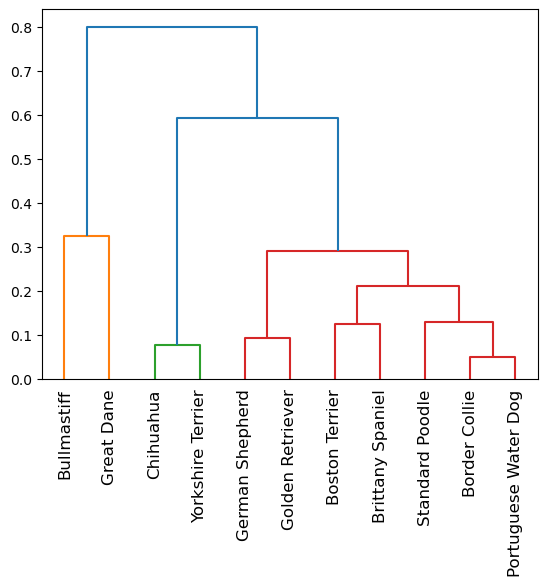

In [32]:
_ = dendrogram(Z, labels=X.index, leaf_rotation=90)